# Occupation Imputation 

Find what variable most heavily correlates (Pearson Correlation Coefficient) with occupation
via filter method and predict for missing values

In [237]:
import pandas as pd, numpy as np

In [238]:
train_df = pd.read_csv('train_occupation_predict.csv', index_col = 0)

In [239]:
test_df = pd.read_csv('test_occupation_predict.csv', index_col = 0)

In [240]:
train_features = train_df.iloc[:,:-2]
train_labels = train_df.iloc[:,-2]
train_target = pd.Series(pd.factorize(train_labels)[0])


In [241]:
test_features = test_df.iloc[:,:-2]
test_target = test_df.iloc[:,-2]

# PCC

In [242]:
def pearson(x,y):
    
    sum_sq_x = 0
    sum_sq_y = 0 
    sum_coproduct = 0
    mean_x = 0
    mean_y = 0
    
    N = len(x)
    
    for i in range(N):
        
        sum_sq_x += x[i] * x[i]
        sum_sq_y += y[i] * y[i]
        sum_coproduct += x[i] * y[i]
        mean_x += x[i]
        mean_y += y[i]
        
    mean_x = mean_x / N
    mean_y = mean_y / N
    pop_sd_x = np.sqrt((sum_sq_x/N) - (mean_x * mean_x))
    pop_sd_y = np.sqrt((sum_sq_y / N) - (mean_y * mean_y))
    cov_x_y = (sum_coproduct / N) - (mean_x * mean_y)
    correlation = cov_x_y / (pop_sd_x * pop_sd_y)
    
    return correlation

In [243]:
def ppc_features(x,y):

    a = np.array(y)
    filt_feat = []

    for i in range(x.shape[1]):
        b = np.array(x.iloc[:,i])
        val = np.abs(pearson(a,b)) # absolute value of R
        filt_feat.append([val,i])

    filt_sort = sorted(filt_feat, reverse=True)
    
    rank = np.array(list(range(len(filt_sort))))
    rank = [x+1 for x in rank]
    feat_n = []
    r_score = []
    for i in range(len(filt_sort)):
        feat_n.append(filt_sort[i][1])
        r_score.append(filt_sort[i][0])
        
    Filter_Ranks = pd.DataFrame(data=np.column_stack((rank, feat_n, r_score)),columns=['Rank','Feature #','R_score'])
    Filter_Ranks["Feature #"] = Filter_Ranks["Feature #"].astype(int)
    Filter_Ranks["Rank"] = Filter_Ranks["Rank"].astype(int)
    
    return Filter_Ranks

In [244]:
trial = ppc_features(train_features, train_target)

/Users/MatiasBerretta/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in double_scalars


In [245]:
list(trial.iloc[:4,1])

[23, 24, 12, 7]

In [246]:
trial

,Rank,Feature #,R_score
0,1,23,0.210514
1,2,24,0.210514
2,3,12,0.127196
3,4,7,0.091092
4,5,17,0.086923
5,6,16,0.062272
6,7,5,0.055891
7,8,9,0.049181
8,9,2,0.043574
9,10,13,0.042611


# Family, Salary, Capital, Hours Per Week

In [247]:
sub_train_feat = train_features.iloc[:,list(trial.iloc[:20,1])]
sub_train_feat.head()

,Female,Male,Husband,Married-civ-spouse,Wife,Unmarried,Divorced,Never-married,capital_gain,Not-in-family,hours_per_week,Dominican-Republic,Own-child,Other,Ecuador,Asian-Pac-Islander,capital_loss,Widowed,El-Salvador,Germany
0,0,1,0,0,0,0,0,1,2174,1,40,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0,13,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,0,1,40,0,0,0,0,0,0,0,0,0
3,0,1,1,1,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0
4,1,0,0,1,1,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0


In [248]:
sub_test_feat = test_features.iloc[:,list(trial.iloc[:20,1])]
sub_test_feat.head()

,Female,Male,Husband,Married-civ-spouse,Wife,Unmarried,Divorced,Never-married,capital_gain,Not-in-family,hours_per_week,Dominican-Republic,Own-child,Other,Ecuador,Asian-Pac-Islander,capital_loss,Widowed,El-Salvador,Germany
27,0,1,1,1,0,0,0,0,0,0,60,0,0,0,0,1,0,0,0,0
61,0,1,0,0,0,0,0,0,0,1,40,0,0,0,0,0,0,0,0,0
69,0,1,0,0,0,0,0,1,0,0,40,0,1,0,0,0,0,0,0,0
77,0,1,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
106,1,0,0,0,0,0,0,1,34095,0,32,0,1,0,0,0,0,0,0,0


# Split

In [249]:
from sklearn.model_selection import train_test_split

In [250]:
X_train, X_test, y_train, y_test = train_test_split(sub_train_feat, train_target, random_state=42, test_size = 0.3)

In [251]:
(y_train.shape, X_train.shape)

((21502,), (21502, 20))

In [252]:
(y_test.shape, X_test.shape)

((9216,), (9216, 20))

# KNN

In [253]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score

In [254]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [255]:
accuracy_score(y_pred, y_test)

0.16796875

# Logistic Regression train-train

Seems to be the way to go

In [256]:
from sklearn.linear_model import LogisticRegression 

In [257]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [258]:
accuracy_score(y_pred, y_test)

0.2384982638888889

# Random Forest

In [259]:
from sklearn.ensemble import RandomForestClassifier

In [260]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [261]:
accuracy_score(y_pred, y_test)

0.23665364583333334

# Ensemble with Naive Bayes, Logistic Regression and Random Forest

In [262]:
from scipy.stats import mode

In [263]:
def ensemble_nblrrf(X_train, X_test, y_train):
    
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    lr_pred = np.array(lr.predict(X_test))
 
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    knn_pred = np.array(knn.predict(X_test))
    
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    rf_pred = np.array(rf.predict(X_test))
    
    democratic_y = []
    
    for i in range(len(lr_pred)):
        vote = mode([lr_pred[i], knn_pred[i], rf_pred[i]])[0][0]
        democratic_y.append(vote)
        
    return pd.Series(democratic_y)

In [264]:
dem_y = ensemble_nblrrf(X_train, X_test, y_train)

In [265]:
accuracy_score(dem_y, y_test)

0.2419704861111111

# Conclusion

Data much more uniformly distributed

In [266]:
(train_labels.value_counts(), len(train_labels))

( Prof-specialty       4140
  Craft-repair         4099
  Exec-managerial      4066
  Adm-clerical         3770
  Sales                3650
  Other-service        3295
  Machine-op-inspct    2002
  Transport-moving     1597
  Handlers-cleaners    1370
  Farming-fishing       994
  Tech-support          928
  Protective-serv       649
  Priv-house-serv       149
  Armed-Forces            9
 Name: occupation_or, dtype: int64, 30718)

In [267]:
print(('Prof-specialty for {}% of workclass instances').format(np.round(4140/30718*100)))
print(('Craft-repair for {}% of workclass instances').format(np.round(4099/30718*100)))
print(('Exec-managerial for {}% of workclass instances').format(np.round(4066/30718*100)))

Prof-specialty for 13.0% of workclass instances
Craft-repair for 13.0% of workclass instances
Exec-managerial for 13.0% of workclass instances


(array([ 3770.,  4066.,  1370.,  4140.,  3295.,  3650.,  4099.,  1597.,
          994.,  2002.,   928.,   649.,     9.,   149.]),
 array([  0.        ,   0.92857143,   1.85714286,   2.78571429,
          3.71428571,   4.64285714,   5.57142857,   6.5       ,
          7.42857143,   8.35714286,   9.28571429,  10.21428571,
         11.14285714,  12.07142857,  13.        ]),
 <a list of 14 Patch objects>)

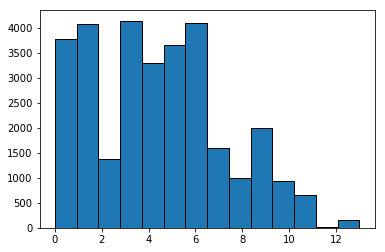

In [268]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(train_df.iloc[:,-1], edgecolor = 'black', bins = len(train_labels.unique()))

In [269]:
train_labels.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

# Ensemble train-test

In [270]:
dem_y = ensemble_nblrrf(sub_train_feat, sub_test_feat, train_target)

In [271]:
occupation_map = {0:' Adm-clerical', 1: ' Exec-managerial',2:' Handlers-cleaners', 3: ' Prof-specialty', 
                  4:' Other-service', 5: ' Sales', 6: ' Craft-repair',
                  7: ' Transport-moving', 8: ' Farming-fishing', 9:' Machine-op-inspct',
                  10: ' Tech-support', 11: ' Protective-serv', 12: ' Armed-Forces',
                  13: ' Priv-house-serv'}

In [272]:
print(sorted(dem_y.unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13]


# Insert np.zero

In [273]:
test_features.insert(loc = 75, column='occupation', value = pd.Series(np.zeros(len(train_labels)), dtype = int))

In [274]:
test_features.iloc[:, 75] = pd.Series(np.zeros(len(train_labels)), dtype = int)

In [275]:
index_ms = test_features.iloc[:, 75].index.values

In [276]:
test_features.iloc[:, 75][index_ms] = dem_y

/Users/MatiasBerretta/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [277]:
test_features.occupation = test_features.occupation.replace(occupation_map)

In [279]:
len(test_features.columns) == len(train_df.columns)

False

# Rest of DataFrame

In [280]:
train_features = train_df.iloc[:,:-3]
train_target = train_df.iloc[:,-3]
train_occupation = train_df.iloc[:,-2]

In [281]:
train_features.insert(loc = 74, column='>50k', value = train_target)

In [282]:
train_features.insert(loc = 75, column='occupation', value = train_occupation)

In [283]:
len(train_features.columns) == len(test_features.columns)

True

# Append two datasets

In [284]:
imputed_df_unsorted = test_features.append(train_features)

In [285]:
imputed_df = imputed_df_unsorted.sort_index()

In [286]:
imputed_df.iloc[:,-1].to_csv('occupation_imputed.csv')

# Dummify and Reinsert

In [229]:
occupation_str = imputed_df.iloc[:,-1]
occupation_str.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv', ' Machine-op-inspect'], dtype=object)

In [230]:
occupation = pd.get_dummies(occupation_str)

In [231]:
occupation.head()

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Machine-op-inspect,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [232]:
imputed_df = imputed_df.iloc[:,:-2]
target = imputed_df.iloc[:,-2]

In [233]:
imputed_df = imputed_df.merge(occupation, left_index=True, right_index = True)

In [235]:
imputed_df.insert(loc = 89, column='>50k', value = target)

In [236]:
imputed_df.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,...,Machine-op-inspct,Machine-op-inspect,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,>50k
0,39,77516,2174,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,50,83311,0,0,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,0,0,40,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,53,234721,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,28,338409,0,0,40,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
